## Confidence Interval 

A daily practice to strengthen programming abilities in finance. Today's topic is Confidence Interval and ACI.


In [346]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import yfinance as yf
import seaborn as sns

In [347]:
import datetime as datetime

In [351]:
# We define function to easily import any stock data
def ACI(tickers):
    
    # import data and calculate daily returns 
    start_date = datetime.datetime(2017,1,1)
    end_date = datetime.datetime(2023,11,28)
    prices = yf.download(tickers, start=start_date, end=end_date)
    portfolio = prices['Adj Close'].dropna(how='all')
    ret = portfolio.pct_change()[1:]
    
    # calculate samople statistics
    np.random.seed(42)
    sample_size = 1739
    confidence_level = 0.95
    sample_mean = round(np.mean(ret),5)
    sample_std = round(np.std(ret, ddof=1),5)
    
    sem = sample_std / (np.sqrt(sample_size))
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    z_score, sem
    lower_bound = round(sample_mean - z_score * sem, 5)
    upper_bound = round(sample_mean + z_score * sem, 5)
    lower_bound, upper_bound
    
    return sample_mean, sample_std, sample_size, lower_bound, upper_bound

In [352]:
ACI('AAPL')

[*********************100%%**********************]  1 of 1 completed


(0.0013, 0.01905, 1739, 0.0004, 0.0022)

/Users/rolandsrepetto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rolandsrepetto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


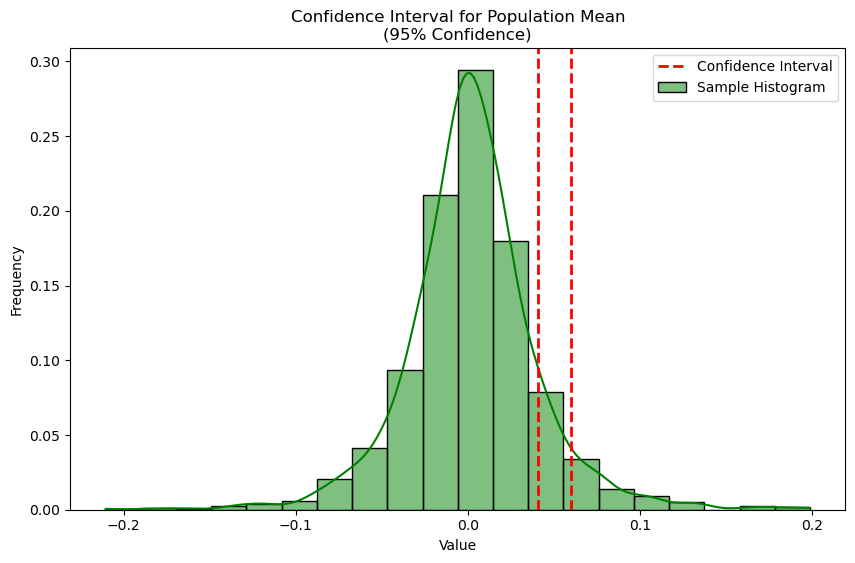

In [353]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(ret, stat='probability', bins=20, kde=True, color='green', edgecolor='black', label='Sample Histogram')

# Plot the confidence interval for the mean
plt.axvline(x=lower_bound, color='red', linestyle='--', linewidth=2, label='Confidence Interval')
plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.title(f"Confidence Interval for Population Mean\n({(confidence_level * 100):.0f}% Confidence)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Add legend
plt.legend()

plt.show()